# 核主成分分析 (Kernel Principal Component Analysis)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from random import choices

# MNIST Dataset

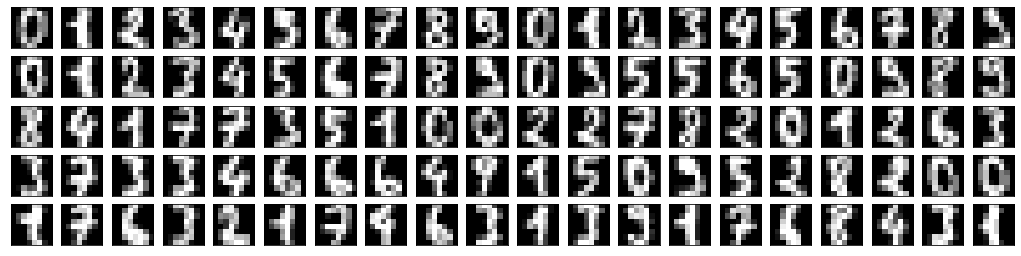

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
x=digits.data/16
y=digits.target
N=len(y)
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# PCA

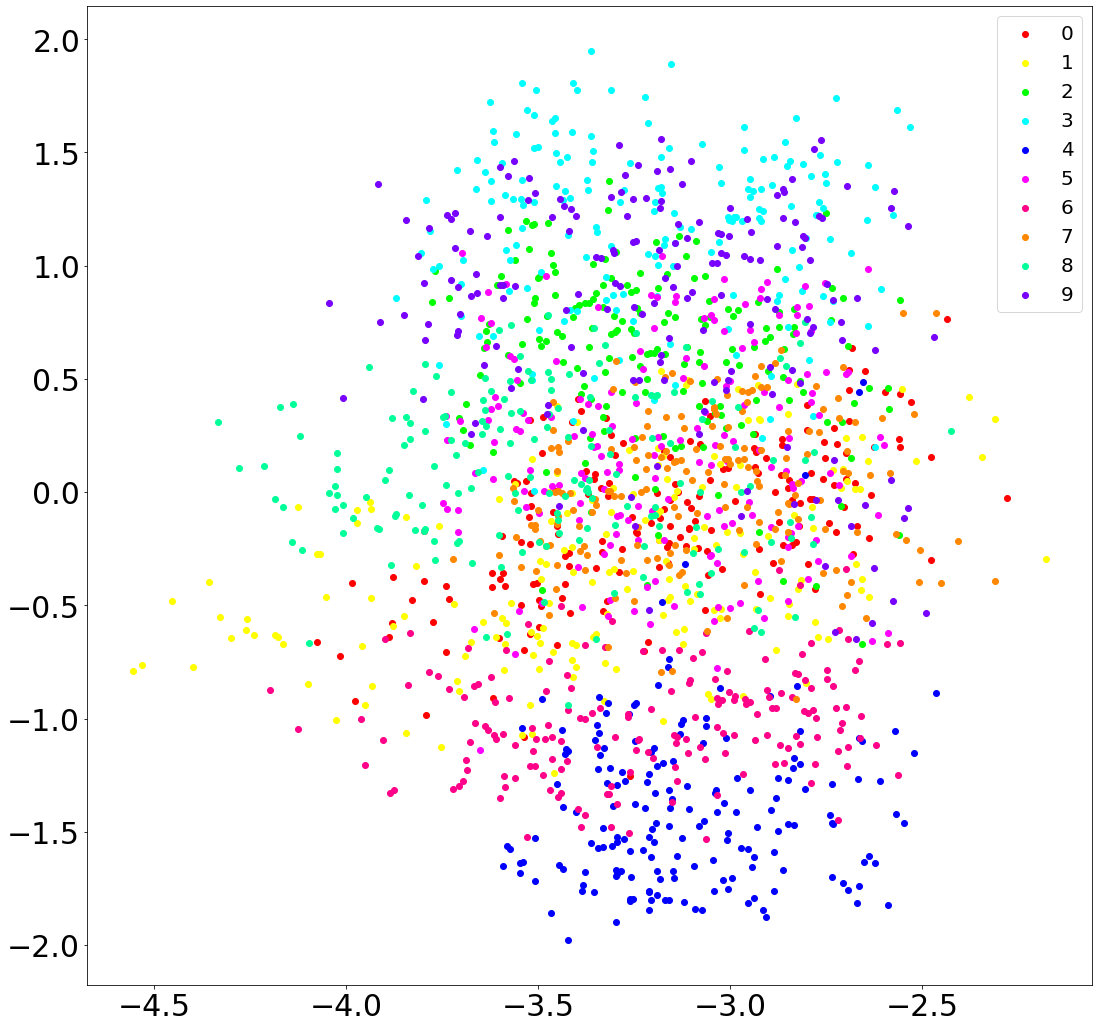

In [3]:
S=np.dot(x.T,x)/N
w,v=np.linalg.eig(S)
new_x=np.dot(x,v[:,:2])
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(new_x[BOOL,0],new_x[BOOL,1],c=color[i],label=i)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.show()

# Kernel PCA

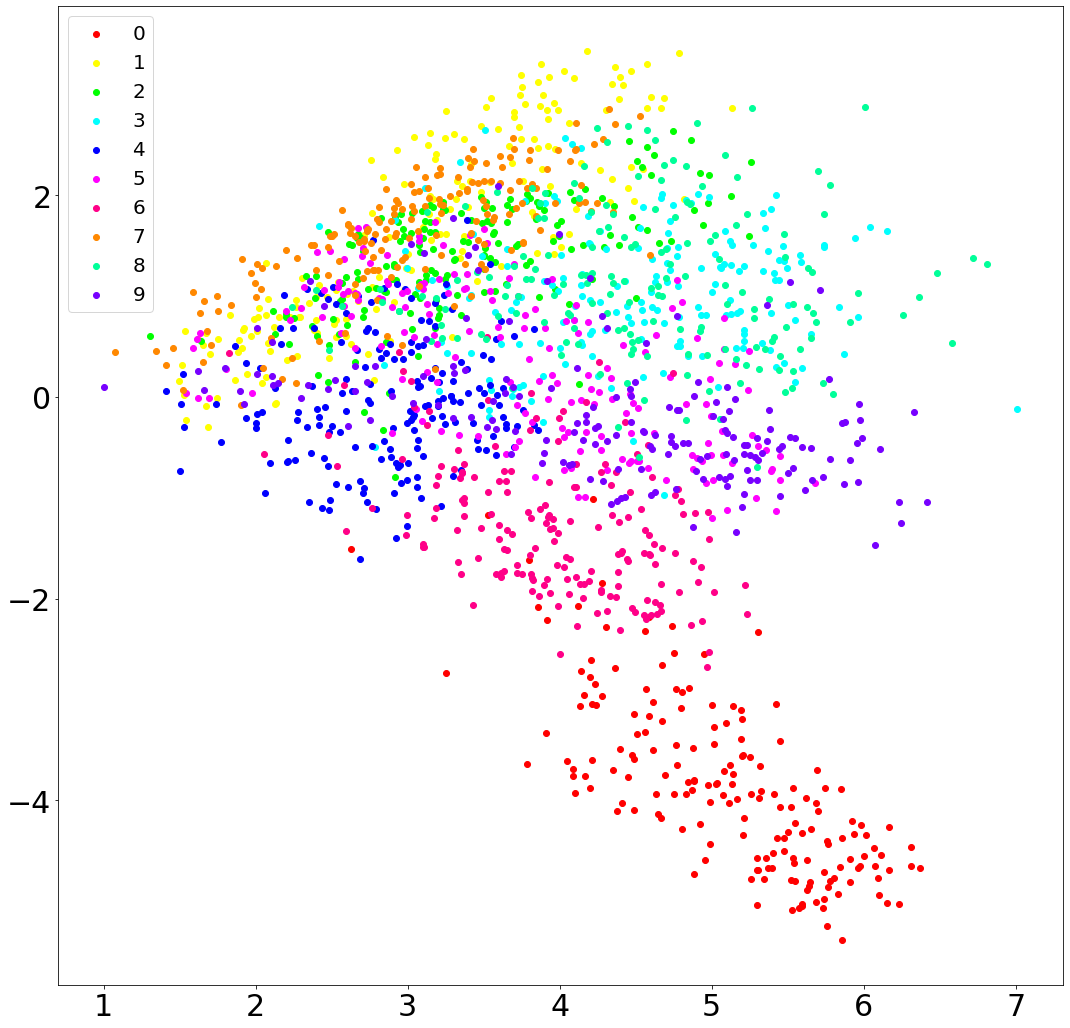

In [4]:
gamma=0.3
K=np.exp(-gamma*((x**2).sum(axis=1).reshape(N,1)+(x**2).sum(axis=1).reshape(1,N)-2*np.dot(x,x.T)))
w_k,v_k=np.linalg.eig(K/N)
new_x_k=np.dot(K,v_k[:,:2])
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(new_x_k[BOOL,0],new_x_k[BOOL,1],c=color[i],label=i)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.show()